In [66]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.optimize import fsolve
from tbcontrol.symbolic import routh
import pandas as pd

In [67]:
def sympyFunction(tf):
    num, den = ctl.tfdata(tf)
    s = sp.var('s')
    num_expr = sum(coef*s**i for i, coef in enumerate(num[0][0][::-1]))
    den_expr = sum(coef*s**i for i, coef in enumerate(den[0][0][::-1]))
    sympy_system = num_expr/den_expr
    return sympy_system

def roundSympyFunction(expr, num_digits=10):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(sp.Float)})

# PROJETANDO O CONTROLADOR
- Usando a frequência de corte $f_c = 0.1\,\text{Hz}$
- Com isso temos a frequência natural $\omega_c = 2\pi f_c$

In [68]:
f_c = 0.1
w_c = 2*np.pi*f_c

f_c, w_c

(0.1, 0.6283185307179586)

- A função de transferência do filtro de primeira ordem tem cara: 

- $C(s) = \frac{1}{Ks + 1}$, $\,\,\,\,\,\,\,\,$ onde $K = \frac{1}{w_c}$

In [69]:
K = 1/w_c
K

1.5915494309189535

In [70]:
s = ctl.TransferFunction.s
C = 1/(K*s + 1)

print(sympyFunction(C))
C

1/(1.59154943091895*s + 1.0)


TransferFunction(array([1]), array([1.59154943, 1.        ]))

In [71]:
poles = ctl.poles(C)
poles

array([-0.62831853+0.j])

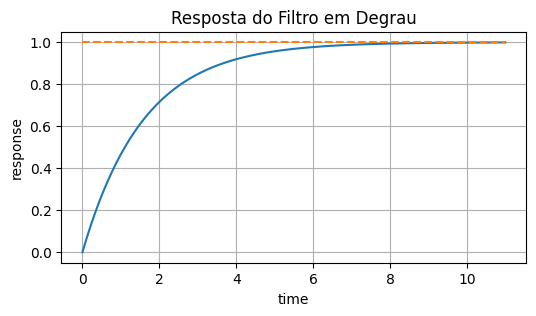

In [72]:
time, response = ctl.step_response(C)

plt.figure(figsize=(6, 3))
plt.plot(time, response)
plt.plot(time, [1 for i in time], '--')
plt.title('Resposta do Filtro em Degrau')
plt.xlabel('time')
plt.ylabel('response')
plt.grid()
plt.show()

#### TESTE GRÁFICO
- O gráfico abaixo mostra que quando a frequência se aproxima da frequência $\omega_{desired}$, ocorre a atenuação

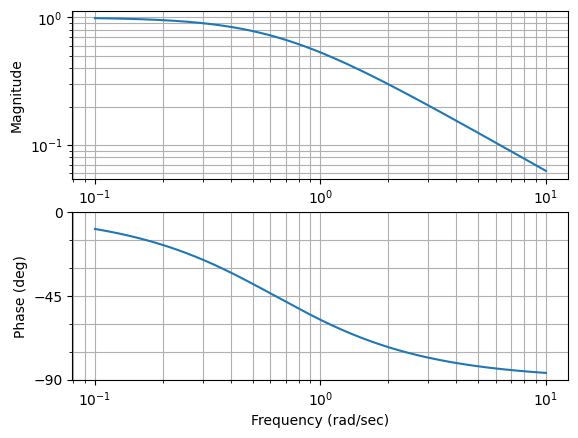

In [73]:
mag, fase, omega = ctl.bode(C, plot=True)

#### TESTE NUMÉRICO
- Vamos através dos vetores de magnitude e fase ver qual é a frequência onde ocorre a atenuação, obtendo a linha da tabela com a menor diferença entre o $\omega_{desired}$ que encontramos, e o $\omega$ da tabela. Vemos que nessa linha, a magnitude foi atenuada para um valor bem baixo
- A magnitude no ponto de frequência de corte deve ser igual a $\frac{1}{\sqrt{2}} = 0.707$ para a devida atenuação, vamos ver se isso realmente ocorre em $|C|_{s \to j\omega_c}$

In [74]:
1/np.sqrt(2)

0.7071067811865475

In [75]:
mag = sympyFunction(C).subs(s, sp.I*w_c)
mag = sp.N(sp.Abs(mag))
float(mag)

0.7071067811865476